# Hello, Ignite ML!

This document contains example of Ignite ML Python API.

In [1]:
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Regression

Lets prepare a regression dataset using scikit-learn.

In [2]:
x, y = make_regression(n_targets=2)
x_train, x_test, y_train, y_test = train_test_split(x, y)

### 1.1. Linear Regression

Now lets train a linear model using Ignite ML and estimate the quality of the model:

In [3]:
from ignite_ml.regression import LinearRegressionTrainer
trainer = LinearRegressionTrainer()
model = trainer.fit(x_train, y_train)

r2_score(y_test, model.predict(x_test))

0.8686737001342073

And just to compare lets do the same for scikit-learn:

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

r2_score(y_test, reg.predict(x_test))

0.8667104943121517

### 1.2. Decision Tree Regression

Using Ignite ML:

In [5]:
from ignite_ml.regression import DecisionTreeRegressionTrainer
trainer = DecisionTreeRegressionTrainer()
model = trainer.fit(x_train, y_train)

r2_score(y_test, model.predict(x_test))

-0.46701903863436534

And using scikit-learn:

In [6]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(x_train, y_train)

r2_score(y_test, reg.predict(x_test))

-0.5970437535766214

### 1.3. KNN Regression

Using Ignite ML:

In [7]:
from ignite_ml.regression import KNNRegressionTrainer
trainer = KNNRegressionTrainer()
model = trainer.fit(x_train, y_train)

r2_score(y_test, model.predict(x_test))

0.15469511559874827

And using scikit-learn:

In [8]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()
reg.fit(x_train, y_train)

r2_score(y_test, reg.predict(x_test))

0.15469511559874827

### 1.4 Random Forest Regression

Using Ignite ML:

In [9]:
from ignite_ml.regression import RandomForestRegressionTrainer
trainer = RandomForestRegressionTrainer()
model = trainer.fit(x_train, y_train)

r2_score(y_test, model.predict(x_test))

-0.4850168470678955

In [10]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train, y_train)

r2_score(y_test, reg.predict(x_test))

/home/gridgain/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.15988245516382615

### 1.5 MLP Regression

Using Ignite ML:

In [11]:
from ignite_ml.common import MLPArchitecture
from ignite_ml.regression import MLPRegressionTrainer

trainer = MLPRegressionTrainer(MLPArchitecture(100).with_layer(2, activator='linear'))
model = trainer.fit(x_train, y_train)

r2_score(y_test, model.predict(x_test))

0.8672041481650776

And using scikit-learn:

In [12]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(max_iter=1000)
reg.fit(x_train, y_train)

r2_score(y_test, reg.predict(x_test))

/home/gridgain/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.3029672295542139

## 2. Classification

Lets prepare a classification dataset using scikit-learn.

In [13]:
x, y = make_classification()
x_train, x_test, y_train, y_test = train_test_split(x, y)

### 2.1 Decision Tree Classification

Using Ignite ML:

In [14]:
from ignite_ml.classification import DecisionTreeClassificationTrainer
trainer = DecisionTreeClassificationTrainer()
model = trainer.fit(x_train, y_train)

accuracy_score(y_test, model.predict(x_test))

0.92

And using scikit-learn:

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

accuracy_score(y_test, clf.predict(x_test))

0.88

### 2.2 ANN Classification

Using Ignite ML:

In [16]:
from ignite_ml.classification import ANNClassificationTrainer
trainer = ANNClassificationTrainer()
model = trainer.fit(x_train, y_train)

accuracy_score(y_test, model.predict(x_test))

0.48

### 2.3 KNN Classification

Using Ignite ML:

In [17]:
from ignite_ml.classification import KNNClassificationTrainer
trainer = KNNClassificationTrainer()
model = trainer.fit(x_train, y_train)

accuracy_score(y_test, model.predict(x_test))

0.88

And using scikit-learn:

In [18]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)

accuracy_score(y_test, clf.predict(x_test))

0.88

### 2.4 LogReg Classification

Using Ignite ML:

In [19]:
from ignite_ml.classification import LogRegClassificationTrainer
trainer = LogRegClassificationTrainer()
model = trainer.fit(x_train, y_train)

accuracy_score(y_test, model.predict(x_test))

0.84

And using scikit-learn:

In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)

accuracy_score(y_test, model.predict(x_test))

0.84

### 2.5 SVM Classification

Using Ignite ML:

In [21]:
from ignite_ml.classification import SVMClassificationTrainer
trainer = SVMClassificationTrainer()
model = trainer.fit(x_train, y_train)

accuracy_score(y_test, model.predict(x_test))

0.76

And using scikit-learn:

In [22]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(x_train, y_train)

accuracy_score(y_test, clf.predict(x_test))

0.88

### 2.6 Random Forest Classification

Using Ignite ML:

In [23]:
from ignite_ml.classification import RandomForestClassificationTrainer
trainer = RandomForestClassificationTrainer()
model = trainer.fit(x_train, y_train)

accuracy_score(y_test, model.predict(x_test))

0.68

And using scikit-learn:

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

accuracy_score(y_test, model.predict(x_test))

0.68

### 2.7 MLP Classification

Using Ignite ML:

In [25]:
from ignite_ml.common import MLPArchitecture
from ignite_ml.classification import MLPClassificationTrainer

def encode_label(x):
    if x:
        return [0, 1]
    else:
        return [1, 0]

def decode_label(x):
    if x[0] > x[1]:
        return 0
    else:
        return 1
    
trainer = MLPRegressionTrainer(MLPArchitecture(20).with_layer(2, activator='sigmoid'))
model = trainer.fit(x_train, [encode_label(x) for x in y_train])

accuracy_score(y_test, [decode_label(x) for x in model.predict(x_test)])

0.96

## 3. Clustering

Lets prepare a clustering dataset using scikit-learn.

In [26]:
x, y = make_blobs(n_samples=2000, n_features=2, cluster_std=1.0, centers=[(-3, -3), (0, 0), (3, 3)])

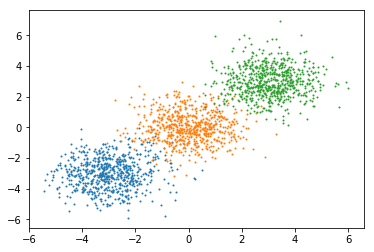

In [27]:
for i in range(3):
    plt.scatter(x[y == i][:, 0], x[y == i][:, 1], s=1)

### 3.1 KMeans Clustering

Using Ignite ML:

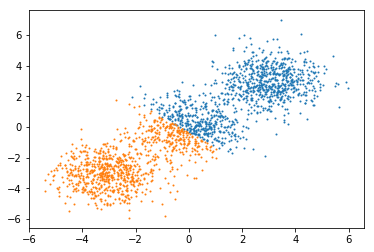

In [28]:
from ignite_ml.clustering import KMeansClusteringTrainer
trainer = KMeansClusteringTrainer(amount_of_clusters=2)
model = trainer.fit(x)

y_predicted = np.array(model.predict(x))
for i in range(3):
    plt.scatter(x[y_predicted == i][:, 0], x[y_predicted == i][:, 1], s=1)

And using scikit-learn:

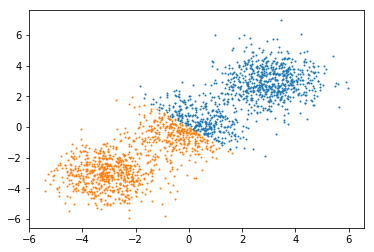

In [29]:
from sklearn.cluster import KMeans
clr = KMeans(n_clusters=2)
clr.fit(x)

y_predicted = np.array(clr.predict(x))
for i in range(2):
    plt.scatter(x[y_predicted == i][:, 0], x[y_predicted == i][:, 1], s=1)

### 3.2 GMM Clustering

Using Ignite ML:

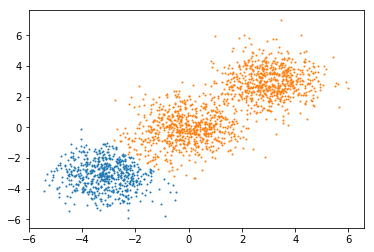

In [30]:
from ignite_ml.clustering import GMMClusteringTrainer
trainer = GMMClusteringTrainer(count_of_components=2, max_count_of_clusters=2)
model = trainer.fit(x)

y_predicted = np.array(model.predict(x))
for i in range(2):
    plt.scatter(x[y_predicted == i][:, 0], x[y_predicted == i][:, 1], s=1)